# WeatherPy
----

#### Note
* Instructions have been included for each segment. You do not have to follow them exactly, but they are included to help you think through the steps.

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import json 
import time

from scipy.stats import linregress

# Import API key
from api_keys import weather_api_key
from citipy import citipy

# Output File (CSV)
output_data_file = "output_data/cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

## Generate Cities List

In [2]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)
# Print the city count to confirm sufficient count
len(cities)

604

### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).


In [3]:
# Get Weather Data
#for city in cities:
query = "http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=" + weather_api_key + "&q=" + cities[0]
response = requests.get(query).json()
print(json.dumps(response, indent=4, sort_keys=True))

{
    "base": "stations",
    "clouds": {
        "all": 9
    },
    "cod": 200,
    "coord": {
        "lat": -46.1927,
        "lon": 168.8643
    },
    "dt": 1635389093,
    "id": 6201424,
    "main": {
        "feels_like": 72.23,
        "grnd_level": 1004,
        "humidity": 41,
        "pressure": 1010,
        "sea_level": 1010,
        "temp": 73.27,
        "temp_max": 73.27,
        "temp_min": 73.27
    },
    "name": "Mataura",
    "sys": {
        "country": "NZ",
        "sunrise": 1635355640,
        "sunset": 1635406149
    },
    "timezone": 46800,
    "visibility": 10000,
    "weather": [
        {
            "description": "clear sky",
            "icon": "01d",
            "id": 800,
            "main": "Clear"
        }
    ],
    "wind": {
        "deg": 337,
        "gust": 5.44,
        "speed": 1.57
    }
}


In [4]:
city = []
lat =[]
lng = []
temp = []
hum = []
cloud = []
wind = []
country = []
date = []

for x in cities:    
    try:
        query = "http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=" + weather_api_key + "&q=" + x
        response = requests.get(query).json()
        city.append(response['name'])
        lat.append(response['coord']['lat'])
        lng.append(response['coord']['lon'])
        temp.append(response['main']['temp'])
        hum.append(response['main']['humidity'])
        cloud.append(response['clouds']['all'])
        wind.append(response['wind']['speed'])
        country.append(response['sys']['country'])
        date.append(response['dt'])
        print(x, "added") 
    
    except:
        print("Error found will skip")
    continue
        
print("END") 
 

mataura added
lincoln added
bethel added
vaini added
tilichiki added
cape town added
hofn added
puerto escondido added
Error found will skip
port-gentil added
tete added
faanui added
georgetown added
hermanus added
mahebourg added
lagoa added
cherskiy added
ponta do sol added
busselton added
barrow added
ushuaia added
okhotsk added
aquiraz added
asau added
nokaneng added
caravelas added
tuatapere added
guadalupe added
Error found will skip
east london added
jijiga added
rikitea added
Error found will skip
sao filipe added
atuona added
khatanga added
carnarvon added
semey added
Error found will skip
katherine added
punta arenas added
killybegs added
upernavik added
vao added
faya added
grand gaube added
puerto ayora added
castro added
saskylakh added
Error found will skip
luderitz added
grindavik added
katsuura added
Error found will skip
kodiak added
esmeraldas added
huayang added
muisne added
vila added
torbay added
ranong added
chuy added
razdolinsk added
trairi added
ahipara added
a

sobolevo added
yertsevo added
comodoro rivadavia added
mandan added
opuwo added
bemidji added
puertollano added
saravan added
kalabagh added
la asuncion added
qasigiannguit added
kogon added
yatou added
tromso added
reidsville added
saldanha added
port augusta added
khandyga added
korbach added
natal added
puerto leguizamo added
kazerun added
yugorsk added
villa carlos paz added
vostochnyy added
coihaique added
Error found will skip
sukabumi added
Error found will skip
villablino added
nacala added
manali added
naron added
teahupoo added
Error found will skip
arman added
vitim added
saveni added
disna added
georgiyevka added
kapuskasing added
sosnovo-ozerskoye added
Error found will skip
pangkalanbuun added
liwale added
pathein added
yarim added
raga added
batavia added
atambua added
tura added
mbarara added
svetlogorsk added
praia da vitoria added
honiara added
marshalltown added
palamuse added
gorontalo added
Error found will skip
viedma added
tutoia added
kropotkin added
iquique add

### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [5]:
weather = pd.DataFrame({"City" : city, "Latitude" : lat, "Longitude" : lng, "Temperature" : temp,"Humidity" : hum,"Cloudiness" : cloud,"Wind": wind, "Country": country, "Date" : date})
weather

,City,Latitude,Longitude,Temperature,Humidity,Cloudiness,Wind,Country,Date
0,Mataura,-46.1927,168.8643,73.27,41,9,1.57,NZ,1635389093
1,Lincoln,40.8000,-96.6670,49.24,95,90,4.00,US,1635389099
2,Bethel,41.3712,-73.4140,48.88,86,1,4.61,US,1635389099
3,Vaini,-21.2000,-175.2000,80.76,78,40,11.50,TO,1635389098
4,Tilichiki,60.4667,166.1000,6.96,83,25,7.23,RU,1635389437
...,...,...,...,...,...,...,...,...,...
547,Staryy Nadym,65.6118,72.6842,14.88,85,100,15.23,RU,1635389903
548,Stettler,52.3168,-112.7186,38.95,56,31,8.05,CA,1635389903
549,Karasburg,-28.0167,18.7500,65.98,50,68,4.00,NA,1635389904
550,Atar,20.5169,-13.0499,77.68,51,97,1.97,MR,1635389904


In [7]:
weather.to_csv("city_weather_data.csv", encoding="utf-8", index=False)

## Inspect the data and remove the cities where the humidity > 100%.
----
Skip this step if there are no cities that have humidity > 100%. 

In [ ]:
#  Get the indices of cities that have humidity over 100%.
# Make a new DataFrame equal to the city data to drop all humidity outliers by index.
# Passing "inplace=False" will make a copy of the city_data DataFrame, which we call "clean_city_data".


## Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

## Latitude vs. Temperature Plot

Text(0.5, 0, 'Latitude')

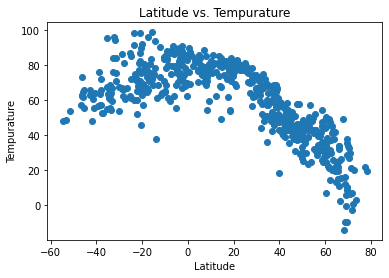

In [8]:
# Generate a scatter plot of Latitude vs. Temperature Plot

#x values
Latitude = weather['Latitude']

#y values
Temp = weather['Temperature']

#Establish Scatter Plot
plt.scatter(Latitude, Temp)

#Chart Formating 
plt.title("Latitude vs. Tempurature")
plt.ylabel("Tempurature")
plt.xlabel("Latitude")

## Latitude vs. Humidity Plot

Text(0.5, 0, 'Latitude')

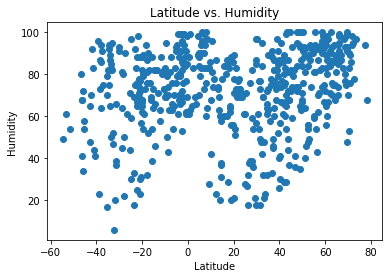

In [11]:
# Generate a scatter plot of Latitude vs. Temperature Plot

#x values
Latitude = weather['Latitude']

#y values
humidity = weather['Humidity']

#Establish Scatter Plot
plt.scatter(Latitude, humidity)

#Chart Formating 
plt.title("Latitude vs. Humidity")
plt.ylabel("Humidity")
plt.xlabel("Latitude")

## Latitude vs. Cloudiness Plot

Text(0.5, 0, 'Latitude')

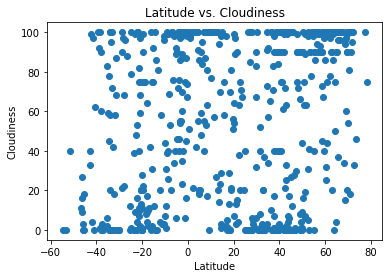

In [10]:
#x values
Latitude = weather['Latitude']

#y values
Cloud = weather['Cloudiness']

#Establish Scatter Plot
plt.scatter(Latitude, Cloud)

#Chart Formating 
plt.title("Latitude vs. Cloudiness")
plt.ylabel("Cloudiness")
plt.xlabel("Latitude")

## Latitude vs. Wind Speed Plot

Text(0.5, 0, 'Latitude')

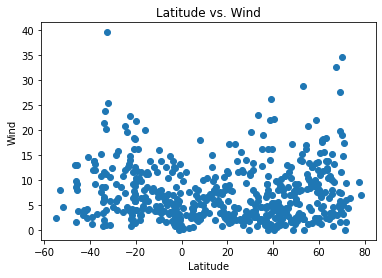

In [13]:
#x values
Latitude = weather['Latitude']

#y values
wind = weather['Wind']

#Establish Scatter Plot
plt.scatter(Latitude, wind)

#Chart Formating 
plt.title("Latitude vs. Wind")
plt.ylabel("Wind")
plt.xlabel("Latitude")

## Linear Regression

####  Northern Hemisphere - Max Temp vs. Latitude Linear Regression

####  Southern Hemisphere - Max Temp vs. Latitude Linear Regression

####  Northern Hemisphere - Humidity (%) vs. Latitude Linear Regression

####  Southern Hemisphere - Humidity (%) vs. Latitude Linear Regression

####  Northern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

####  Southern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

####  Northern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

####  Southern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression